# Pronostico 1985- 2019 Corderos

## Intentamos predecir la cantidad de corderos que va a sacar

Importamos las librerias necesarias

In [25]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

Cargamos datos de produccion y del clima de los ulltimos 35 años

In [2]:
data = pd.read_csv('datos_produccion_clima_35.csv')
data

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
0,31/12/1985,3514,1419,912,15600,0.00,0.00,4.44,64.27,14.3,6.4,20.9,0.0,208.6,0.0,6.1
1,31/12/1986,3783,1520,680,18167,0.00,0.00,4.80,44.74,12.9,5.8,20.5,58.1,130.3,0.0,6.8
2,31/12/1987,3988,1928,512,11200,0.00,0.00,2.81,26.56,13.8,6.8,20.7,60.3,199.5,0.0,6.4
3,31/12/1988,3590,1560,310,13197,0.00,0.00,3.68,19.87,12.9,5.5,20.4,54.9,85.5,0.0,6.3
4,31/12/1989,2830,1210,150,12300,0.00,0.00,4.35,12.40,14.5,7.1,21.9,56.5,92.5,0.0,6.3
5,31/12/1990,2396,998,124,13900,0.00,0.00,5.80,12.42,14.2,6.8,21.7,56.2,96.0,0.0,7.4
6,31/12/1991,2503,1122,60,15800,0.00,0.00,6.31,5.35,13.2,5.8,20.6,60.3,240.0,0.0,6.3
7,31/12/1992,2790,1125,70,11600,0.00,0.00,4.16,6.22,14.4,4.7,19.9,62.2,335.2,0.0,6.4
8,31/12/1993,2765,1240,65,10306,0.00,0.00,3.73,5.24,14.8,5.5,21.0,58.1,155.7,0.0,5.9
9,31/12/1994,2641,925,34,9000,0.00,0.00,3.41,3.68,13.5,4.6,24.3,53.7,82.5,0.0,15.5


Nos quedamos con las columnas que nos interesan

In [3]:
data_intermedia = data[['fecha','corderos']]
data_intermedia

,fecha,corderos
0,31/12/1985,912
1,31/12/1986,680
2,31/12/1987,512
3,31/12/1988,310
4,31/12/1989,150
5,31/12/1990,124
6,31/12/1991,60
7,31/12/1992,70
8,31/12/1993,65
9,31/12/1994,34


Convertimos la columna fecha en datetime

In [4]:
data_intermedia['fecha'] = pd.to_datetime(data_intermedia['fecha'])
data_temp = data_intermedia
data_intermedia

/tmp/ipykernel_26426/2026727361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_intermedia['fecha'] = pd.to_datetime(data_intermedia['fecha'])


,fecha,corderos
0,1985-12-31,912
1,1986-12-31,680
2,1987-12-31,512
3,1988-12-31,310
4,1989-12-31,150
5,1990-12-31,124
6,1991-12-31,60
7,1992-12-31,70
8,1993-12-31,65
9,1994-12-31,34


Convertimos la columna fcha en el indice del df

In [5]:
data_temp.set_index('fecha',inplace=True)
data_temp.index.name = None
data_temp

,corderos
1985-12-31,912
1986-12-31,680
1987-12-31,512
1988-12-31,310
1989-12-31,150
1990-12-31,124
1991-12-31,60
1992-12-31,70
1993-12-31,65
1994-12-31,34


Visualizamos los datos

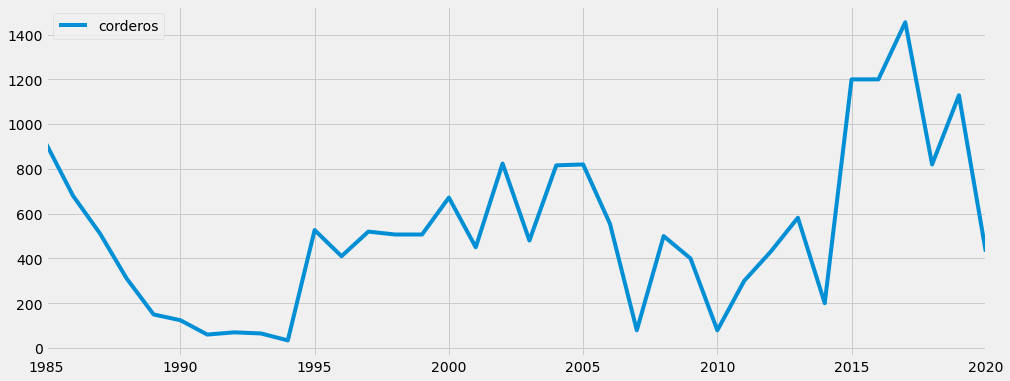

In [7]:
data_temp.plot(figsize=(15, 6))
plt.show()

Cuando buscamos ajustar datos de series de tiempo con un modelo ARIMA estacional, nuestro primer objetivo es encontrar los valores ARIMA(p,d,q)(P,D,Q)s que optimizan una métrica de interés.

Asi que buscamos y seleccionamos los parámetros para el modelo de serie temporal ARIMA

In [8]:
# Define the p, d and q parameters to take any value between 0 and 2
# Defina los parámetros p, d y q para tomar cualquier valor entre 0 y 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
# Genere todas las diferentes combinaciones de tripletes p, d y q
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Genere todas las combinaciones diferentes de tripletes p, d y q estacionales
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('Ejemplos de combinaciones de parámetros para ARIMA estacional...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
Ejemplos de combinaciones de parámetros para ARIMA estacional...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
results_aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_temp,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            results_aic.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63323D+00    |proj g|=  4.77993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   9.930D-07   7.633D+00
  F =   7.6329922420418130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:551.5754414270106
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.33994D+00    |proj g|=  1.16715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     26      1     0     0   3.575D-06   2.340D+00
  F =   2.3399392294803998     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:174.4756245225888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22130D+00    |proj g|=  3.47682D-01

At iterate    5    f=  7.19349D+00    |proj g|=  5.90290D-04

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.63637D+00    |proj g|=  1.90388D-04

At iterate   10    f=  4.63635D+00    |proj g|=  5.87794D-03

At iterate   15    f=  4.63539D+00    |proj g|=  2.38722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     22      1     0     0   2.397D-06   4.635D+00
  F =   4.6351259393912914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:337.729067636173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:159.48918105006533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27707D+00    |proj g|=  1.16106D+00

At iterate    5    f=  5.07016D+00    |proj g|=  9.08486D-03

At iterate   10    f=  5.07001D+00    |proj g|=  3.24733D-03

At iterate   15    f=  5.06791D+00    |proj g|=  4.45460D-02

At iterate   20    f=  5.03585D+00    |proj g|=  1.91066D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   7.698D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.65964D+00    |proj g|=  4.30286D-04

At iterate   15    f=  4.65957D+00    |proj g|=  9.95503D-03

At iterate   20    f=  4.65208D+00    |proj g|=  1.10756D-01

At iterate   25    f=  4.63395D+00    |proj g|=  1.03057D-03

At iterate   30    f=  4.63394D+00    |proj g|=  7.08544D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     32      1     0     0   7.085D-06   4.634D+00
  F =   4.6339421350566523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:341.64383372407895
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15214D+00    |proj g|=  1.79539D-01

At iterate    5    f=  2.13235D+00    |proj g|=  6.73134D-04

At iterate   10    f=  2.13225D+00    |proj g|=  2.17149D-02

At iterate   15    f=  2.12601D+00    |proj g|=  4.51200D-02

At iterate   20    f=  2.12371D+00    |proj g|=  8.82000D-05

At iterate   25    f=  2.12370D+00    |proj g|=  2.89358D-03

At iterate   30    f=  2.12206D+00    |proj g|=  2.72247D-02

At iterate   35    f=  2.11840D+00    |proj g|=  8.52229D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23278D+00    |proj g|=  2.04231D-01

At iterate    5    f=  2.15158D+00    |proj g|=  3.63461D-04

At iterate   10    f=  2.14991D+00    |proj g|=  9.31264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     19      1     0     0   9.145D-07   2.150D+00
  F =   2.1496731764282995     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:158.77646870283755
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31082D+00    |proj g|=  1.17955D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.180D-06   2.311D+00
  F =   2.3108184927036288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:170.37893147466127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.90707D+00    |proj g|=  4.48331D-04

At iterate   10    f=  1.90707D+00    |proj g|=  9.69696D-04

At iterate   15    f=  1.90691D+00    |proj g|=  1.13580D-02

At iterate   20    f=  1.90605D+00    |proj g|=  3.18727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   6.979D-07   1.906D+00
  F =   1.9060334571296222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:143.2344089133328
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.22451D+00    |proj g|=  4.75872D-04

At iterate   10    f=  4.22449D+00    |proj g|=  1.88447D-03

At iterate   15    f=  4.22341D+00    |proj g|=  1.24588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   3.639D-05   4.223D+00
  F =   4.2228282201003982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:312.04363184722865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:172.28314207952056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92974D+00    |proj g|=  7.16101D-02

At iterate    5    f=  1.91229D+00    |proj g|=  1.83618D-02

At iterate   10    f=  1.90836D+00    |proj g|=  1.50035D-02

At iterate   15    f=  1.90707D+00    |proj g|=  2.03182D-04

At iterate   20    f=  1.90707D+00    |proj g|=  8.64675D-04

At iterate   25    f=  1.90690D+00    |proj g|=  1.08670D-02

At iterate   30    f=  1.90603D+00    |proj g|=  4.71198D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.31968D+00    |proj g|=  1.28035D-02

At iterate   25    f=  2.31918D+00    |proj g|=  5.03031D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   6.740D-07   2.319D+00
  F =   2.3191848521808165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:172.9813093570188
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09161D+00    |proj g|=  7.43803D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.29565D+00    |proj g|=  4.81960D-02

At iterate   10    f=  2.29374D+00    |proj g|=  4.61322D-04

At iterate   15    f=  2.29365D+00    |proj g|=  2.06507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     30      1     0     0   3.388D-06   2.294D+00
  F =   2.2936364447667539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:171.14182402320628
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   20    f=  2.28230D+00    |proj g|=  5.04745D-02

At iterate   25    f=  2.27768D+00    |proj g|=  4.30152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     38      1     0     0   9.763D-07   2.278D+00
  F =   2.2776521981034632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:171.99095826344936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73073D+00    |proj g|=  4.66808D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.43725D+00    |proj g|=  8.05205D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     29      1     0     0   8.052D-06   4.437D+00
  F =   4.4372531845858889     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:327.482229290184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59709D+00    |proj g|=  7.17629D-02

At iterate    5    f=  4.59212D+00    |proj g|=  1.33899D-04

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:159.60293304647638
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95374D+00    |proj g|=  5.96348D-01

At iterate    5    f=  4.60558D+00    |proj g|=  1.22168D-01

At iterate   10    f=  4.59470D+00    |proj g|=  1.44194D-04

At iterate   15    f=  4.59469D+00    |proj g|=  2.45146D-03

At iterate   20    f=  4.59449D+00    |proj g|=  2.43108D-02

At iterate   25    f=  4.59395D+00    |proj g|=  1.88747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.40707D+00    |proj g|=  4.05377D-03

At iterate   20    f=  4.40684D+00    |proj g|=  3.81481D-02

At iterate   25    f=  4.40556D+00    |proj g|=  1.21907D-02

At iterate   30    f=  4.40550D+00    |proj g|=  1.68773D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     37      1     0     0   3.092D-06   4.405D+00
  F =   4.4054959383072259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:327.19570755812026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate   20    f=  2.08529D+00    |proj g|=  2.37777D-03

At iterate   25    f=  2.08388D+00    |proj g|=  2.87110D-02

At iterate   30    f=  2.07597D+00    |proj g|=  4.00458D-03

At iterate   35    f=  2.07575D+00    |proj g|=  3.27824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     41      1     0     0   6.599D-06   2.076D+00
  F =   2.0757454454862003     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:159.4536720750064
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.43536D+00    |proj g|=  6.08262D-02

At iterate   20    f=  4.42905D+00    |proj g|=  8.74030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   3.141D-07   4.429D+00
  F =   4.4290472981463935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:324.89140546654033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58353D+00    |proj g|=  3.97167D-06

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44317D+00    |proj g|=  1.19891D-01

At iterate    5    f=  4.41833D+00    |proj g|=  5.18579D-04

At iterate   10    f=  4.41828D+00    |proj g|=  4.38517D-03

At iterate   15    f=  4.41601D+00    |proj g|=  3.88040D-02

At iterate   20    f=  4.41186D+00    |proj g|=  2.12469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   2.985D-07   4.412D+00
  F =   4.4118631854134476     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09632D+00    |proj g|=  1.12051D-01

At iterate    5    f=  2.08178D+00    |proj g|=  2.27566D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   7.692D-06   2.082D+00
  F =   2.0817800301093019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:157.88816216786975
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.87599D+00    |proj g|=  1.76463D-03

At iterate   15    f=  1.87598D+00    |proj g|=  6.11567D-05

At iterate   20    f=  1.87597D+00    |proj g|=  2.49941D-03

At iterate   25    f=  1.87519D+00    |proj g|=  1.74485D-02

At iterate   30    f=  1.87440D+00    |proj g|=  1.71757D-03

At iterate   35    f=  1.87439D+00    |proj g|=  6.68896D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     45      1     0     0   6.689D-06   1.874D+00
  F =   1.8743868805058932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:142.9558553964

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.40645D+00    |proj g|=  3.52200D-04

At iterate   15    f=  4.40632D+00    |proj g|=  2.01173D-02

At iterate   20    f=  4.40310D+00    |proj g|=  4.47271D-02

At iterate   25    f=  4.40233D+00    |proj g|=  8.32171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   4.252D-05   4.402D+00
  F =   4.4023308298263313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:324.96781974749587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89791D+00    |proj g|=  9.21026D-02

At iterate    5    f=  1.88355D+00    |proj g|=  7.69855D-02

At iterate   10    f=  1.87489D+00    |proj g|=  1.98225D-03

At iterate   15    f=  1.87461D+00    |proj g|=  5.68583D-04

At iterate   20    f=  1.87460D+00    |proj g|=  9.22403D-05

At iterate   25    f=  1.87458D+00    |proj g|=  1.74885D-03

At iterate   30    f=  1.87384D+00    |proj g|=  8.00639D-03

At iterate   35    f=  1.87323D+00    |proj g|=  2.01179D-03

At iterate   40    f=  1.87320D+00    |proj g|=  4.81791D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [10]:
min(results_aic)
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:167.03781106166736

142.9558553964243

Creamos el modelo y lo entrenamos

In [28]:
mod = sm.tsa.statespace.SARIMAX(data_temp,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)

results = mod.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78574D+00    |proj g|=  8.02544D-02

At iterate    5    f=  4.76050D+00    |proj g|=  1.88334D-02

At iterate   10    f=  4.75934D+00    |proj g|=  3.25628D-04

At iterate   15    f=  4.74630D+00    |proj g|=  1.07263D-02

At iterate   20    f=  4.74439D+00    |proj g|=  1.54495D-03

At iterate   25    f=  4.74307D+00    |proj g|=  6.36114D-04

At iterate   30    f=  4.74307D+00    |proj g|=  6.29222D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

Miramos comportamiento del modelo

In [29]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9285      0.260     -3.566      0.000      -1.439      -0.418
ma.L1          0.5839      0.279      2.096      0.036       0.038       1.130
ma.S.L12      -1.0001      0.301     -3.325      0.001      -1.590      -0.411
sigma2      1.004e+05      3e-06   3.35e+10      0.000       1e+05       1e+05


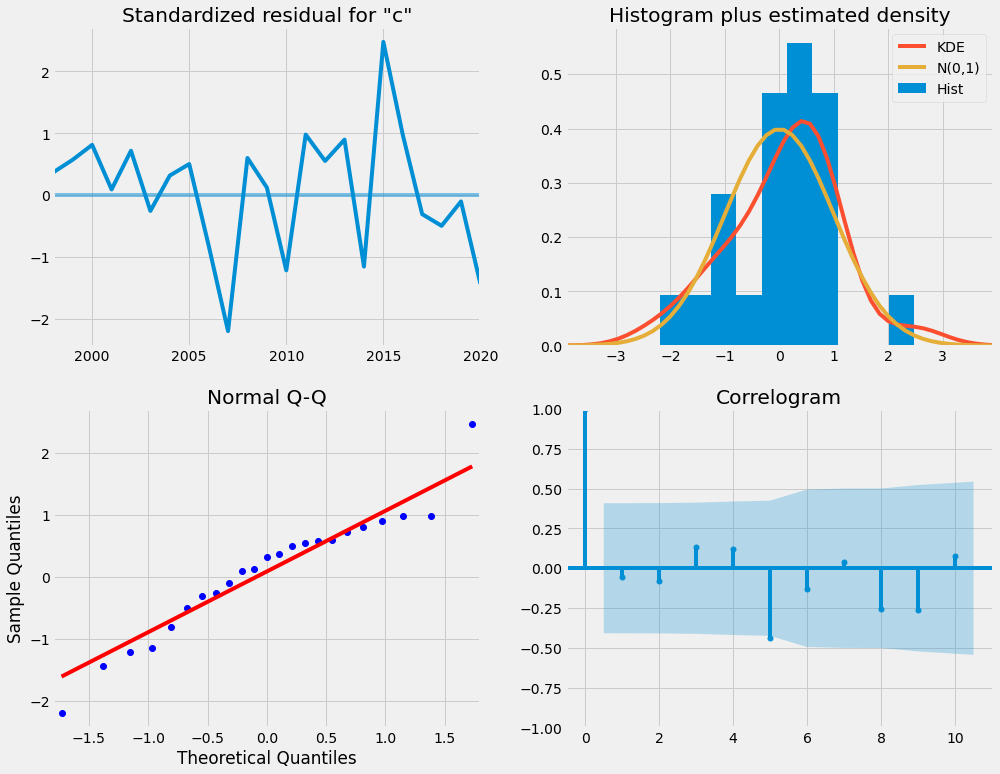

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

En este caso, el diagnóstico de nuestro modelo sugiere lo siguiente:

- En el gráfico superior derecho, vemos que la línea roja KDE sigue masomenos de cerca a la línea N(0,1)(donde N(0,1) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1). Ésta es una indicación de que los residuos se distribuyen bastante normalmente.
- El gráfico qq en la parte inferior izquierda muestra que la distribución ordenada de los residuos (puntos azules) sigue masomenos la tendencia lineal de las muestras tomadas de una distribución normal estándar con N(0,1). Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.
- Los residuos a lo largo del tiempo (gráfico superior izquierdo) y eñ gráfico de autocorrelación (es decir, correlograma) en la parte inferior derecha, no son buenos.
Esas observaciones nos llevan a concluir que nuestro modelo produce un ajuste poco satisfactorio.

Hacemos predicciones

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower corderos,upper corderos
2019-12-31,417.117915,1917.877195
2020-12-31,228.623706,1728.179714


In [14]:
algo = pred.summary_frame(alpha=0.05)
algo

corderos,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-12-31,1167.497555,382.853790,417.117915,1917.877195
2020-12-31,978.401710,382.546827,228.623706,1728.179714


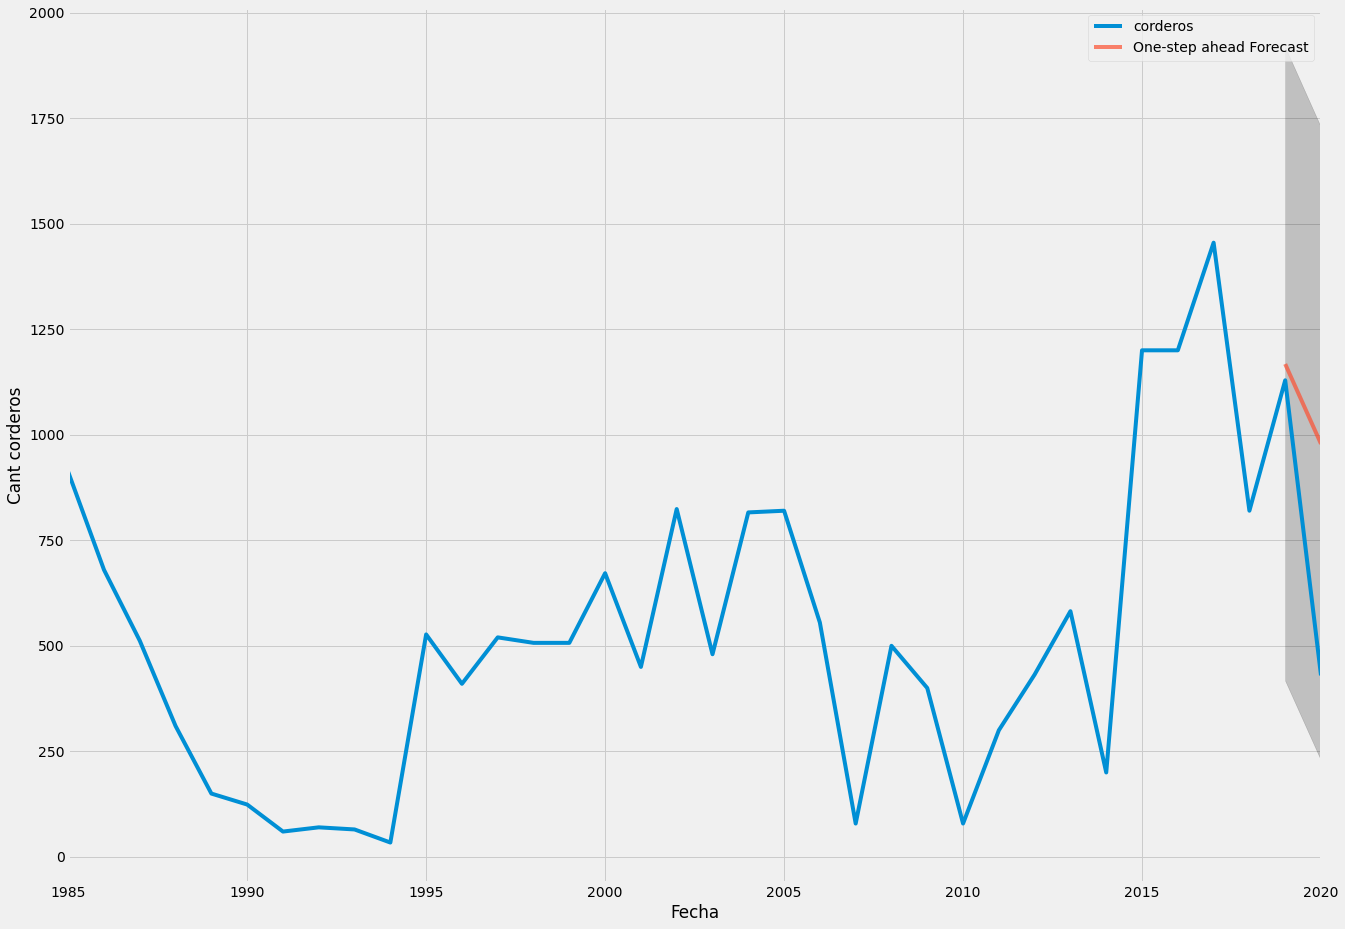

In [18]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cant corderos')
plt.legend()

plt.show()

PREDICE MAL

In [26]:
y_forecasted = pred.predicted_mean
y_truth = data_temp['2019-12-31':]
# Compute the mean square error
# Calcule el error cuadrático medio
mse = mean_squared_error(y_truth, y_forecasted)
#mse
print('El error cuadrático medio de nuestros pronósticos es {}'.format(round(mse, 2)))

El error cuadrático medio de nuestros pronósticos es 151113.25


Hago otra prediccion pero dos años adelante

In [17]:
pred_1 = results.get_prediction(start=pd.to_datetime('2016-12-31'), end=pd.to_datetime('2022-12-31') , dynamic=False)
pred_ci_1 = pred_1.conf_int()
pred_ci_1

,lower corderos,upper corderos
2016-12-31,74.187343,1576.586511
2017-12-31,820.908917,2323.021227
2018-12-31,258.570082,1760.155468
2019-12-31,417.117915,1917.877195
2020-12-31,228.623706,1728.179714
2021-12-31,163.212651,1653.814690
2022-12-31,-548.199790,1216.924499


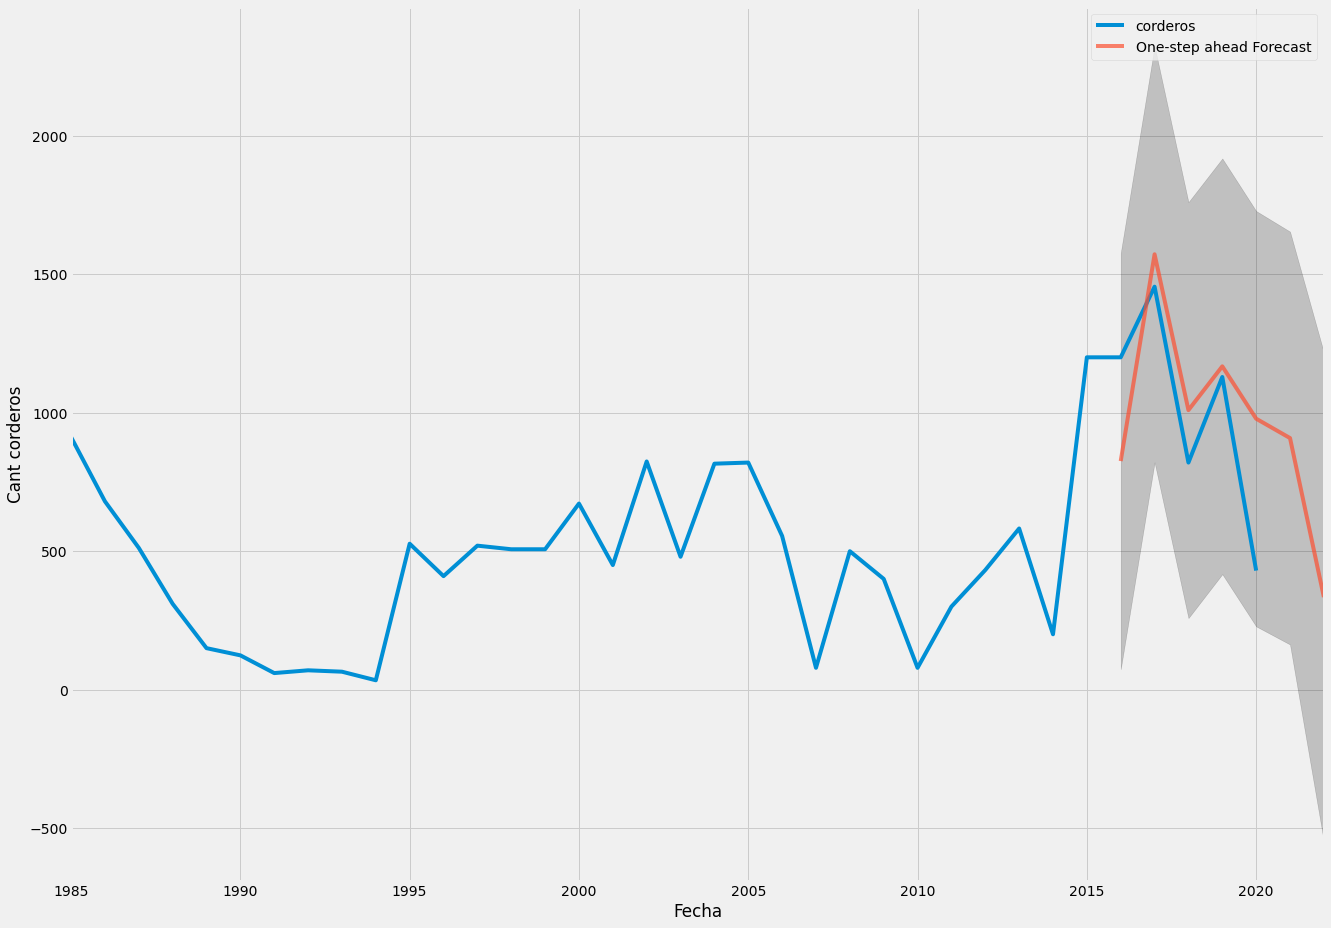

In [19]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred_1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci_1.index,
                pred_ci_1.iloc[:, 0],
                pred_ci_1.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cant corderos')
plt.legend()

plt.show()

PREDICE BASTANTE BIEN EN COMPARACIÓN

Esta es otra forma de predecir

In [20]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci

,lower corderos,upper corderos
2019-12-31,417.117915,1917.877195
2020-12-31,100.488564,1908.098612


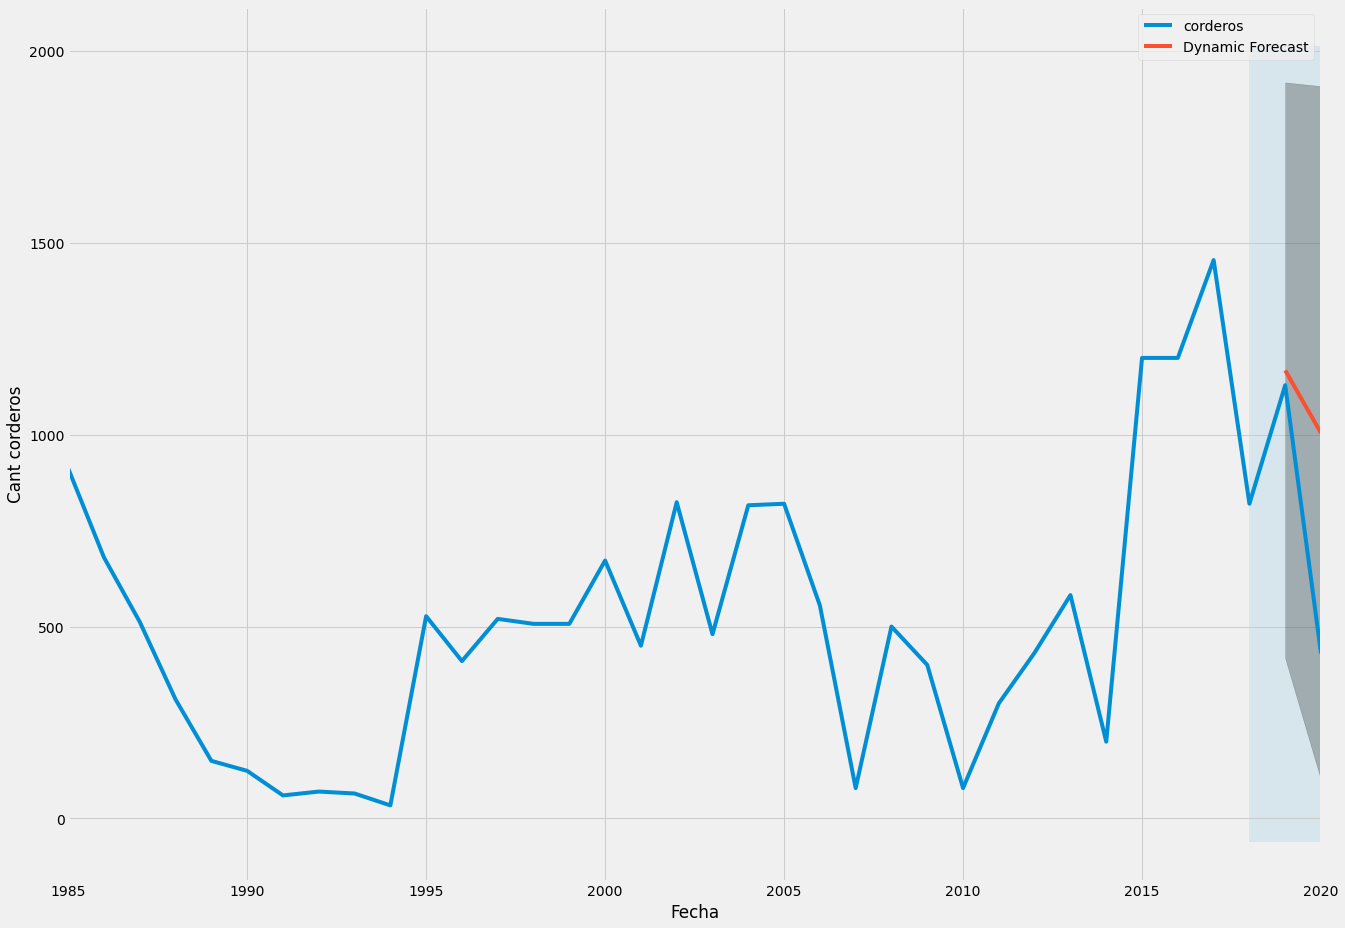

In [21]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), data_temp.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cant corderos')

plt.legend()
plt.show()

In [27]:
# Extract the predicted and true values of our time series
# Extraiga los valores predichos y verdaderos de nuestra serie de tiempo
y_forecasted = pred_dynamic.predicted_mean
y_truth = data_temp['2019-01-01':]

# Compute the mean square error
# Calcule el error cuadrático medio
mse = mean_squared_error(y_truth, y_forecasted)
print('El error cuadrático medio de nuestros pronósticos es {}'.format(round(mse, 2)))

El error cuadrático medio de nuestros pronósticos es 165647.59


Predice mal!

Predecimos 10 años en el futuro

In [23]:
# Get forecast 500 steps ahead in future
# Obtenga una previsión de 10 pasos adelante en el futuro
pred_uc = results.get_forecast(steps=10)

# Get confidence intervals of forecasts
# Obtenga intervalos de confianza de los pronósticos
pred_ci = pred_uc.conf_int()

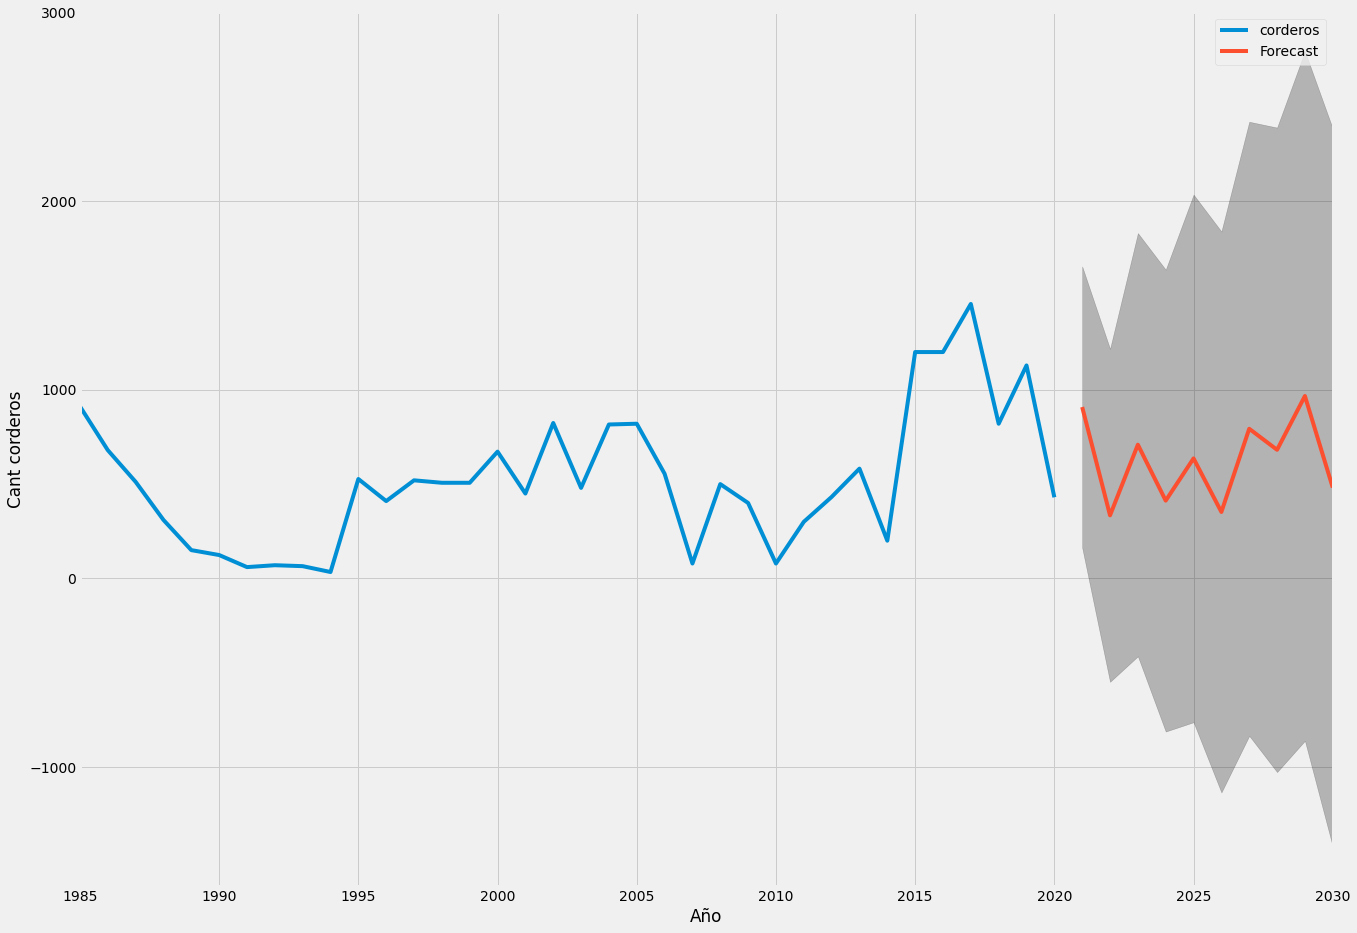

In [24]:
ax = data_temp.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Año')
ax.set_ylabel('Cant corderos')

plt.legend()
plt.show()